In [71]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

In [75]:
file_sample = 'power_samples.txt'
file_delta = 'power_deltas.txt'
labels = ["ECPU0","ECPU1","ECPU2","ECPU3","PCPU0","PCPU1","PCPU2","PCPU3","ECPU","PCPU"]

In [63]:
with open(file_sample, 'r') as file:
    tsv_reader = csv.reader(file, delimiter='\t')
    data_list = []
    for row in tsv_reader:
        cleaned_row = [value for value in row if value != '']
        data_list.append([float(value) for value in cleaned_row])

sample_array = np.array(data_list)

In [64]:
with open(file_delta, 'r') as file:
    tsv_reader = csv.reader(file, delimiter='\t')
    data_list = []
    for row in tsv_reader:
        cleaned_row = [value for value in row if value != '']
        data_list.append([float(value) for value in cleaned_row])

delta_array = np.array(data_list)

In [65]:
sample_arrdelta = []
prev = 0
# Calculate delta from sample array
for i in range(10):
    new_arr = []
    for j in range(10):
        if j == 0:
            prev = 0
        else:
            prev = j-1
            
        new_arr.append(sample_array[i][j] - sample_array[i][prev])
    sample_arrdelta.append(new_arr)


In [69]:
# How similar are the delta and two samples?
sample_arrdelta - delta_array

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  1., -2.,  1.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  1., -1.,  0.,  1., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0., -1.,  0.,  1., -1.,  0.,  1.],
       [ 0.,  2., -2., -3.,  6., -1., -7.,  4., -3.,  0.]])

In [73]:
# Compute mW for both
smpl_arr_delta = np.asarray(sample_arrdelta)
sampdelta_mW = np.divide(smpl_arr_delta, 5)
delta_mW = np.divide(delta_array, 5)

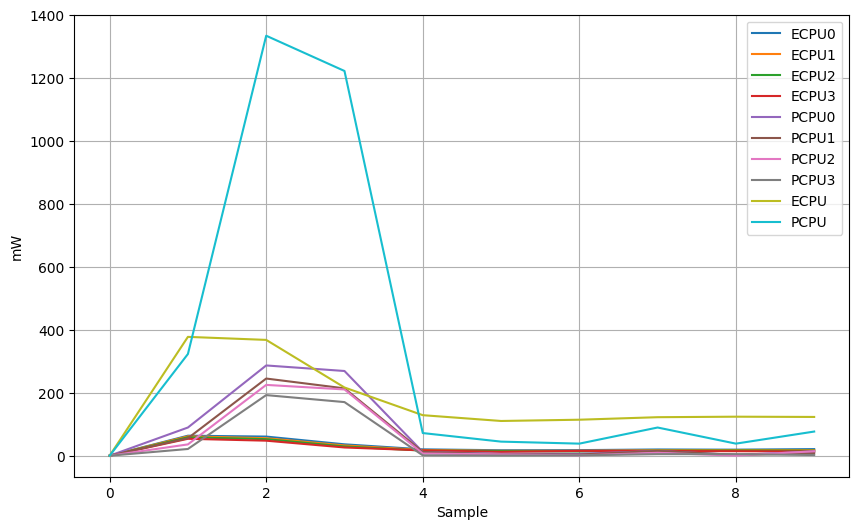

In [78]:
# plot
num_samples, num_timepoints = sampdelta_mW.shape

# Creating time points (assuming they are equally spaced)
timepoints = np.arange(num_timepoints)

# Plotting
plt.figure(figsize=(10, 6))
for i in range(num_samples):
    plt.plot(timepoints, sampdelta_mW[i], label=labels[i])

plt.xlabel('Sample')
plt.ylabel('mW')
plt.legend()
plt.grid(True)
plt.show()
